In [1]:
import numpy as np
import pandas as pd
from astropy.io import ascii
from astropy.coordinates import SkyCoord
from astropy import units as u
import os
import matplotlib.pyplot as plt
import mpl_scatter_density
from sklearn.mixture import GaussianMixture

# Comparing catalogue (vG+2023)

In [3]:
df_vg =  pd.read_csv('Catalogues/NGC1027_vG2023.csv')
df_vg

,Cluster,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,Pmemb
0,NGC_1027,464951723292819968,41.772135,61.274116,0.6217,-1.782,2.180,20.267270,21.371332,19.017168,0.14
1,NGC_1027,464951718989883648,41.779064,61.282946,0.5958,-1.377,2.178,19.770304,20.728146,18.736492,0.07
2,NGC_1027,465565182055866752,40.242362,60.604988,0.6284,-1.446,1.902,19.578695,20.702978,18.411455,0.07
3,NGC_1027,464950211462625792,41.654500,61.223746,0.9554,-1.741,1.936,16.519371,17.166830,15.747625,1.00
4,NGC_1027,464950074017174144,41.706367,61.227523,0.9045,-2.173,1.719,19.949920,21.067705,18.782500,0.19
...,...,...,...,...,...,...,...,...,...,...,...
1375,NGC_1027,465682103948024320,40.527086,61.684232,0.8644,-2.316,1.874,11.910837,12.088751,11.595915,1.00
1376,NGC_1027,465682035228745984,40.490942,61.678906,0.8660,-1.312,2.082,16.132994,16.789839,15.288035,1.00
1377,NGC_1027,465682005172847488,40.472969,61.653809,0.8779,-1.946,2.045,14.885021,15.356849,14.236008,1.00
1378,NGC_1027,465682520568867328,40.578721,61.703776,0.8366,-1.964,2.524,13.101703,13.398318,12.616863,1.00


In [4]:
jj, = np.where(df_vg.Pmemb >= 0.7)
dfvg = df_vg.iloc[jj]

In [5]:
dfvg

,Cluster,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,Pmemb
3,NGC_1027,464950211462625792,41.654500,61.223746,0.9554,-1.741,1.936,16.519371,17.166830,15.747625,1.00
5,NGC_1027,464949661706849280,41.570274,61.173409,0.8300,-1.596,2.023,16.192581,16.815716,15.430469,1.00
10,NGC_1027,465821265193693184,41.527225,62.399228,0.9978,-1.830,2.110,15.333253,15.886968,14.608139,1.00
15,NGC_1027,464952681062317696,42.129509,61.202537,0.8452,-1.683,2.050,17.742489,18.591160,16.850595,0.95
16,NGC_1027,464952685363761920,42.117877,61.201853,0.9092,-1.717,2.039,15.829679,16.399100,15.107857,1.00
...,...,...,...,...,...,...,...,...,...,...,...
1374,NGC_1027,465682138307961984,40.502905,61.688217,0.7229,-1.701,2.168,17.668420,18.450249,16.765095,0.78
1375,NGC_1027,465682103948024320,40.527086,61.684232,0.8644,-2.316,1.874,11.910837,12.088751,11.595915,1.00
1376,NGC_1027,465682035228745984,40.490942,61.678906,0.8660,-1.312,2.082,16.132994,16.789839,15.288035,1.00
1377,NGC_1027,465682005172847488,40.472969,61.653809,0.8779,-1.946,2.045,14.885021,15.356849,14.236008,1.00


# 5 Populations

In [6]:
p1_5p = pd.read_csv('Catalogues/pop1_NGC1027_GMM1_5populations.csv')
p2_5p = pd.read_csv('Catalogues/pop2_NGC1027_GMM1_5populations.csv')
p3_5p = pd.read_csv('Catalogues/pop3_NGC1027_GMM1_5populations.csv')
p4_5p = pd.read_csv('Catalogues/pop4_NGC1027_GMM1_5populations.csv')
p5_5p = pd.read_csv('Catalogues/pop5_NGC1027_GMM1_5populations.csv')

## Computing Completeness and Purity

### Population 1

In [7]:
ra1 = p1_5p.RA_ICRS
dec1 = p1_5p.DE_ICRS

ra2 = dfvg.RA_ICRS
dec2 = dfvg.DE_ICRS

In [8]:
#Catalogue from my work with GMM
catalog1 = SkyCoord(ra=ra1, dec=dec1, unit='degree')
#Catalogue from vG+2023
catalog2 = SkyCoord(ra=ra2, dec=dec2, unit='degree')

In [9]:
idx, d2d, d3d = catalog1.match_to_catalog_sky(catalog2)

In [10]:
max_sep = 1.0 * u.arcsec  # Exemplo de separacao limite de 1 segundo de arco
matches = d2d < max_sep

# Selecionar apenas correspondências válidas
matched_idx = idx[matches]
matched_d2d = d2d[matches]

In [11]:
matched_idx_catalog1 = np.where(matches)[0]
matched_idx_catalog2 = idx[matches]

In [12]:
p1_5p.iloc[matched_idx_catalog1]


,RA_ICRS,DE_ICRS,Source,Plx,e_Plx,PM,pmRA,pmDE,Solved,nueff,...,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr,cluster


In [13]:
dfvg.iloc[matched_idx_catalog2]

,Cluster,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,Pmemb


Text(0, 0.5, 'DEC (deg)')

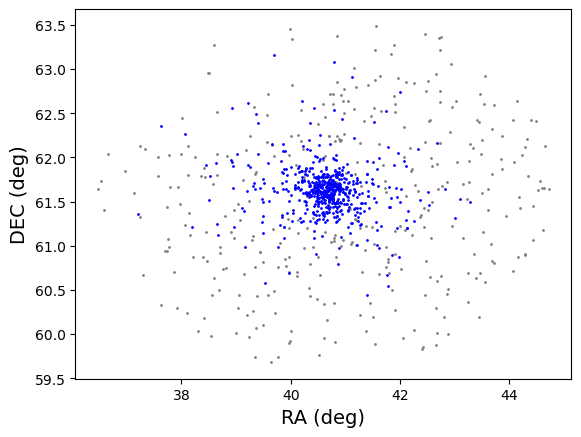

In [15]:
fig, ax = plt.subplots()

ax.scatter(p1_5p.RA_ICRS, p1_5p.DE_ICRS, s=1, c='grey')
ax.scatter(dfvg.RA_ICRS, dfvg.DE_ICRS, s=1, c='b')
ax.scatter(p1_5p.iloc[matched_idx_catalog1].RA_ICRS, p1_5p.iloc[matched_idx_catalog1].DE_ICRS, s=4, c='r')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
#ax.set_ylim(-11.5,-14.2)
#ax.set_xlim(121.2,124.5)

In [16]:
dfvg_t = len(dfvg)
p1_5p_t = len(p1_5p.iloc[matched_idx_catalog1])

Completeness


In [17]:
p1_5p_c = p1_5p_t /dfvg_t
p1_5p_c*100

0.0

Pureness

In [18]:
p1_5p_p = p1_5p_t/len(p1_5p)
p1_5p_p*100

0.0

### Population 2

In [19]:
ra1 = p2_5p.RA_ICRS
dec1 = p2_5p.DE_ICRS

ra2 = dfvg.RA_ICRS
dec2 = dfvg.DE_ICRS

In [20]:
#Catalogue from my work with GMM
catalog1 = SkyCoord(ra=ra1, dec=dec1, unit='degree')
#Catalogue from vG+2023
catalog2 = SkyCoord(ra=ra2, dec=dec2, unit='degree')

In [21]:
idx, d2d, d3d = catalog1.match_to_catalog_sky(catalog2)

In [22]:
max_sep = 1.0 * u.arcsec  # Exemplo de separacao limite de 1 segundo de arco
matches = d2d < max_sep

# Selecionar apenas correspondências válidas
matched_idx = idx[matches]
matched_d2d = d2d[matches]

In [23]:
matched_idx_catalog1 = np.where(matches)[0]
matched_idx_catalog2 = idx[matches]

In [24]:
p2_5p

,RA_ICRS,DE_ICRS,Source,Plx,e_Plx,PM,pmRA,pmDE,Solved,nueff,...,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr,cluster
0,41.570274,61.173409,464949661706849280,0.8300,0.0378,2.577,-1.596,2.023,31,1.440,...,16.192581,16.815716,15.430469,1.385247,NaN,42.572996,41.570289,61.173400,0.858649,1
1,41.654500,61.223746,464950211462625792,0.9554,0.0447,2.603,-1.741,1.936,31,1.433,...,16.519371,17.166830,15.747625,1.419205,NaN,42.602652,41.654516,61.223737,0.984442,1
2,42.138625,61.394109,464956361855632896,0.8718,0.0169,2.700,-1.764,2.044,31,1.610,...,11.991033,12.207760,11.621119,0.586641,-67.03,42.665070,42.138641,61.394100,0.911275,1
3,41.209813,61.006434,465597755092954240,0.8735,0.0226,2.731,-1.759,2.089,31,1.467,...,14.797569,15.339229,14.089526,1.249702,NaN,42.490896,41.209829,61.006425,0.906890,1
4,40.921602,61.094598,465602702895244672,0.8258,0.0870,2.829,-1.878,2.115,95,NaN,...,17.198761,NaN,NaN,NaN,NaN,42.628222,40.921619,61.094589,0.862360,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,39.393160,62.037031,465901289021026048,0.8896,0.0225,2.970,-2.030,2.167,31,1.464,...,14.832691,15.384083,14.117809,1.266274,NaN,43.788269,39.393179,62.037021,0.922578,1
414,39.648913,62.152402,465909294840009728,0.8991,0.0144,2.786,-1.944,1.996,31,1.554,...,13.535378,13.855075,13.034800,0.820275,NaN,43.841792,39.648931,62.152393,0.932254,1
415,40.356277,62.084900,465984336508841088,0.9350,0.0698,2.723,-1.865,1.984,31,1.407,...,17.112860,17.850330,16.284063,1.566267,NaN,43.641074,40.356295,62.084891,0.965201,1
416,40.516560,62.135372,465984748825655424,0.8318,0.0223,3.015,-2.007,2.251,31,1.498,...,14.682241,15.133806,14.042489,1.091317,-24.84,43.655545,40.516579,62.135362,0.864589,1


In [25]:
p2_5p.iloc[matched_idx_catalog1]


,RA_ICRS,DE_ICRS,Source,Plx,e_Plx,PM,pmRA,pmDE,Solved,nueff,...,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr,cluster
0,41.570274,61.173409,464949661706849280,0.8300,0.0378,2.577,-1.596,2.023,31,1.440,...,16.192581,16.815716,15.430469,1.385247,NaN,42.572996,41.570289,61.173400,0.858649,1
1,41.654500,61.223746,464950211462625792,0.9554,0.0447,2.603,-1.741,1.936,31,1.433,...,16.519371,17.166830,15.747625,1.419205,NaN,42.602652,41.654516,61.223737,0.984442,1
2,42.138625,61.394109,464956361855632896,0.8718,0.0169,2.700,-1.764,2.044,31,1.610,...,11.991033,12.207760,11.621119,0.586641,-67.03,42.665070,42.138641,61.394100,0.911275,1
3,41.209813,61.006434,465597755092954240,0.8735,0.0226,2.731,-1.759,2.089,31,1.467,...,14.797569,15.339229,14.089526,1.249702,NaN,42.490896,41.209829,61.006425,0.906890,1
5,40.922414,61.094239,465602702895244800,0.9349,0.0354,2.764,-1.855,2.050,31,1.455,...,15.765883,16.284992,14.968859,1.316134,NaN,42.627734,40.922431,61.094230,0.967899,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,39.393160,62.037031,465901289021026048,0.8896,0.0225,2.970,-2.030,2.167,31,1.464,...,14.832691,15.384083,14.117809,1.266274,NaN,43.788269,39.393179,62.037021,0.922578,1
414,39.648913,62.152402,465909294840009728,0.8991,0.0144,2.786,-1.944,1.996,31,1.554,...,13.535378,13.855075,13.034800,0.820275,NaN,43.841792,39.648931,62.152393,0.932254,1
415,40.356277,62.084900,465984336508841088,0.9350,0.0698,2.723,-1.865,1.984,31,1.407,...,17.112860,17.850330,16.284063,1.566267,NaN,43.641074,40.356295,62.084891,0.965201,1
416,40.516560,62.135372,465984748825655424,0.8318,0.0223,3.015,-2.007,2.251,31,1.498,...,14.682241,15.133806,14.042489,1.091317,-24.84,43.655545,40.516579,62.135362,0.864589,1


In [26]:
dfvg.iloc[matched_idx_catalog2]

,Cluster,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,Pmemb
5,NGC_1027,464949661706849280,41.570274,61.173409,0.8300,-1.596,2.023,16.192581,16.815716,15.430469,1.0
3,NGC_1027,464950211462625792,41.654500,61.223746,0.9554,-1.741,1.936,16.519371,17.166830,15.747625,1.0
92,NGC_1027,464956361855632896,42.138625,61.394109,0.8718,-1.764,2.044,11.991033,12.207760,11.621119,1.0
939,NGC_1027,465597755092954240,41.209813,61.006434,0.8735,-1.759,2.089,14.797569,15.339229,14.089526,1.0
794,NGC_1027,465602702895244800,40.922414,61.094239,0.9349,-1.855,2.050,15.765883,16.284992,14.968859,1.0
...,...,...,...,...,...,...,...,...,...,...,...
874,NGC_1027,465901289021026048,39.393160,62.037031,0.8896,-2.030,2.167,14.832691,15.384083,14.117809,1.0
857,NGC_1027,465909294840009728,39.648913,62.152402,0.8991,-1.944,1.996,13.535378,13.855075,13.034800,1.0
564,NGC_1027,465984336508841088,40.356277,62.084900,0.9350,-1.865,1.984,17.112860,17.850330,16.284063,1.0
561,NGC_1027,465984748825655424,40.516560,62.135372,0.8318,-2.007,2.251,14.682241,15.133806,14.042489,1.0


Text(0, 0.5, 'DEC (deg)')

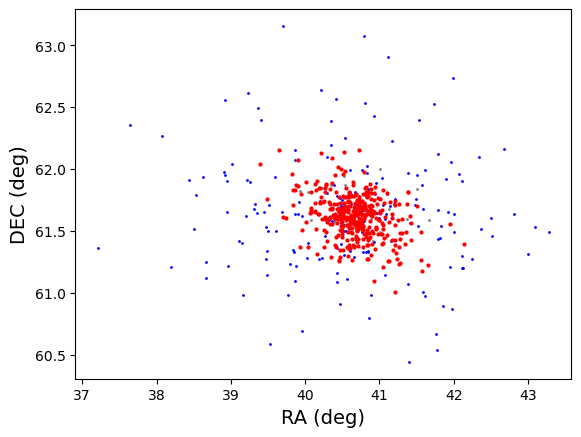

In [28]:
fig, ax = plt.subplots()

ax.scatter(p2_5p.RA_ICRS, p2_5p.DE_ICRS, s=1, c='grey')
ax.scatter(dfvg.RA_ICRS, dfvg.DE_ICRS, s=1, c='b')
ax.scatter(p2_5p.iloc[matched_idx_catalog1].RA_ICRS, p2_5p.iloc[matched_idx_catalog1].DE_ICRS, s=4, c='r')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
#ax.set_ylim(-11.5,-14.2)
#ax.set_xlim(121.2,124.5)

In [30]:
dfvg_t = len(dfvg)
p2_5p_t = len(p2_5p.iloc[matched_idx_catalog1])

Completeness


In [31]:
p2_5p_c = p2_5p_t /dfvg_t
p2_5p_c*100

65.66164154103853

Pureness

In [32]:
p2_5p_p = p2_5p_t/len(p2_5p)
p2_5p_p*100

93.77990430622009

### Population 3

In [33]:
ra1 = p3_5p.RA_ICRS
dec1 = p3_5p.DE_ICRS

ra2 = dfvg.RA_ICRS
dec2 = dfvg.DE_ICRS

In [34]:
#Catalogue from my work with GMM
catalog1 = SkyCoord(ra=ra1, dec=dec1, unit='degree')
#Catalogue from vG+2023
catalog2 = SkyCoord(ra=ra2, dec=dec2, unit='degree')

In [35]:
idx, d2d, d3d = catalog1.match_to_catalog_sky(catalog2)

In [36]:
max_sep = 1.0 * u.arcsec  # Exemplo de separacao limite de 1 segundo de arco
matches = d2d < max_sep

# Selecionar apenas correspondências válidas
matched_idx = idx[matches]
matched_d2d = d2d[matches]

In [37]:
matched_idx_catalog1 = np.where(matches)[0]
matched_idx_catalog2 = idx[matches]

In [38]:
p3_5p.iloc[matched_idx_catalog1]


,RA_ICRS,DE_ICRS,Source,Plx,e_Plx,PM,pmRA,pmDE,Solved,nueff,...,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr,cluster
112,41.773826,60.540374,464776037646911104,0.8545,0.1063,2.811,-1.799,2.160,31,1.362,...,17.921892,18.853360,16.956484,1.896875,NaN,41.953426,41.773842,60.540364,0.882463,2
120,41.391974,60.440972,464797963461759488,0.8665,0.0250,2.589,-1.793,1.868,31,1.439,...,15.092919,15.710403,14.297459,1.412945,NaN,41.937564,41.391990,60.440964,0.900277,2
145,41.760686,60.667446,464824798418117120,0.9060,0.0240,2.491,-1.459,2.020,31,1.451,...,15.022243,15.609508,14.280652,1.328855,NaN,42.072503,41.760699,60.667437,0.939593,2
152,41.971368,60.869426,464833766309733248,0.8965,0.0135,2.625,-1.530,2.133,31,1.545,...,13.546622,13.889764,13.031779,0.857985,NaN,42.216559,41.971382,60.869417,0.930231,2
158,41.851684,60.892326,464836652527754368,0.9197,0.0136,2.608,-1.809,1.878,31,1.540,...,12.826741,13.182690,12.293089,0.889601,NaN,42.260835,41.851700,60.892318,0.941174,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1312,40.929175,62.430013,466019207341152256,0.9167,0.0369,2.785,-2.045,1.891,31,1.425,...,15.846997,16.483763,14.985683,1.498079,NaN,43.843213,40.929195,62.430005,0.949817,2
1322,40.799686,62.532005,466023644050466560,0.9817,0.0642,2.630,-1.725,1.986,31,1.393,...,17.081020,17.874979,16.217472,1.657507,NaN,43.960869,40.799703,62.531996,1.012394,2
1330,40.418877,62.564527,466034982764139008,0.9564,0.0162,2.989,-1.798,2.388,31,1.530,...,13.865103,14.244426,13.308497,0.935928,NaN,44.064098,40.418894,62.564516,0.989366,2
1527,42.672829,62.162159,467252240914244480,0.9654,0.0409,2.769,-1.700,2.186,31,1.426,...,16.238014,16.906803,15.442007,1.464796,NaN,43.267141,42.672845,62.162149,0.994258,2


In [39]:
dfvg.iloc[matched_idx_catalog2]

,Cluster,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,Pmemb
399,NGC_1027,464776037646911104,41.773826,60.540374,0.8545,-1.799,2.160,17.921892,18.853360,16.956484,0.79
479,NGC_1027,464797963461759488,41.391974,60.440972,0.8665,-1.793,1.868,15.092919,15.710403,14.297459,0.99
307,NGC_1027,464824798418117120,41.760686,60.667446,0.9060,-1.459,2.020,15.022243,15.609508,14.280652,0.99
289,NGC_1027,464833766309733248,41.971368,60.869426,0.8965,-1.530,2.133,13.546622,13.889764,13.031779,1.00
293,NGC_1027,464836652527754368,41.851684,60.892326,0.9197,-1.809,1.878,12.826741,13.182690,12.293089,1.00
...,...,...,...,...,...,...,...,...,...,...,...
1131,NGC_1027,466019207341152256,40.929175,62.430013,0.9167,-2.045,1.891,15.846997,16.483763,14.985683,1.00
1140,NGC_1027,466023644050466560,40.799686,62.532005,0.9817,-1.725,1.986,17.081020,17.874979,16.217472,0.95
1097,NGC_1027,466034982764139008,40.418877,62.564527,0.9564,-1.798,2.388,13.865103,14.244426,13.308497,1.00
406,NGC_1027,467252240914244480,42.672829,62.162159,0.9654,-1.700,2.186,16.238014,16.906803,15.442007,1.00


Text(0, 0.5, 'DEC (deg)')

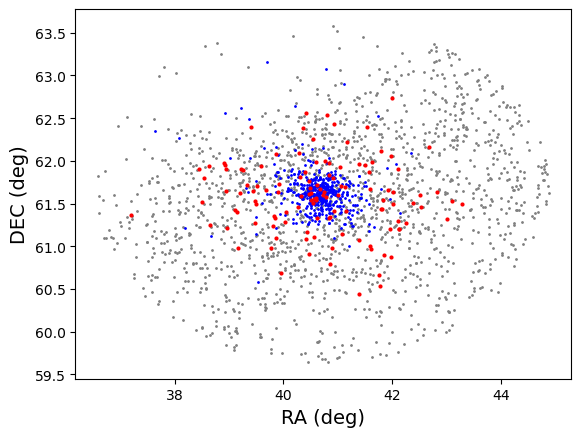

In [41]:
fig, ax = plt.subplots()

ax.scatter(p3_5p.RA_ICRS, p3_5p.DE_ICRS, s=1, c='grey')
ax.scatter(dfvg.RA_ICRS, dfvg.DE_ICRS, s=1, c='b')
ax.scatter(p3_5p.iloc[matched_idx_catalog1].RA_ICRS, p3_5p.iloc[matched_idx_catalog1].DE_ICRS, s=4, c='r')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
#ax.set_ylim(-11.5,-14.2)
#ax.set_xlim(121.2,124.5)

In [42]:
dfvg_t = len(dfvg)
p3_5p_t = len(p3_5p.iloc[matched_idx_catalog1])

Completeness


In [43]:
p3_5p_c = p3_5p_t /dfvg_t
p3_5p_c*100

20.100502512562816

Pureness

In [44]:
p3_5p_p = p3_5p_t/len(p3_5p)
p3_5p_p*100

6.952491309385864

### Population 4

In [45]:
ra1 = p4_5p.RA_ICRS
dec1 = p4_5p.DE_ICRS

ra2 = dfvg.RA_ICRS
dec2 = dfvg.DE_ICRS

In [46]:
#Catalogue from my work with GMM
catalog1 = SkyCoord(ra=ra1, dec=dec1, unit='degree')
#Catalogue from vG+2023
catalog2 = SkyCoord(ra=ra2, dec=dec2, unit='degree')

In [47]:
idx, d2d, d3d = catalog1.match_to_catalog_sky(catalog2)

In [48]:
max_sep = 1.0 * u.arcsec  # Exemplo de separacao limite de 1 segundo de arco
matches = d2d < max_sep

# Selecionar apenas correspondências válidas
matched_idx = idx[matches]
matched_d2d = d2d[matches]

In [49]:
matched_idx_catalog1 = np.where(matches)[0]
matched_idx_catalog2 = idx[matches]

In [50]:
p4_5p.iloc[matched_idx_catalog1]


,RA_ICRS,DE_ICRS,Source,Plx,e_Plx,PM,pmRA,pmDE,Solved,nueff,...,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr,cluster
258,39.526175,60.583305,465245395975703936,0.8741,0.0514,3.004,-2.137,2.112,31,1.384,...,16.723840,17.558813,15.836010,1.722803,NaN,42.442626,39.526194,60.583296,0.904984,3
302,38.665564,61.121025,465462377723163776,0.9549,0.0632,2.959,-2.019,2.163,31,1.382,...,16.952963,17.767070,16.058432,1.708639,NaN,43.106761,38.665583,61.121015,0.986037,3
390,40.691139,61.568018,465677675845868544,0.9276,0.0275,3.259,-2.264,2.345,31,1.462,...,15.485000,16.041930,14.766274,1.275656,NaN,43.105270,40.691160,61.568008,0.960486,3
392,40.569773,61.593159,465679359473038208,0.9002,0.0344,3.469,-2.185,2.694,31,1.452,...,15.897775,16.469511,15.142194,1.327317,NaN,43.152051,40.569794,61.593147,0.933005,3
448,40.833525,62.027908,465797625692666112,1.0130,0.0574,3.152,-2.348,2.103,31,1.412,...,16.607548,17.331436,15.784102,1.547335,NaN,43.496042,40.833547,62.027899,1.042554,3


In [51]:
dfvg.iloc[matched_idx_catalog2]

,Cluster,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,Pmemb
36,NGC_1027,465245395975703936,39.526175,60.583305,0.8741,-2.137,2.112,16.723840,17.558813,15.836010,0.93
471,NGC_1027,465462377723163776,38.665564,61.121025,0.9549,-2.019,2.163,16.952963,17.767070,16.058432,0.92
1237,NGC_1027,465677675845868544,40.691139,61.568018,0.9276,-2.264,2.345,15.485000,16.041930,14.766274,1.00
1198,NGC_1027,465679359473038208,40.569773,61.593159,0.9002,-2.185,2.694,15.897775,16.469511,15.142194,0.70
199,NGC_1027,465797625692666112,40.833525,62.027908,1.0130,-2.348,2.103,16.607548,17.331436,15.784102,0.77


Text(0, 0.5, 'DEC (deg)')

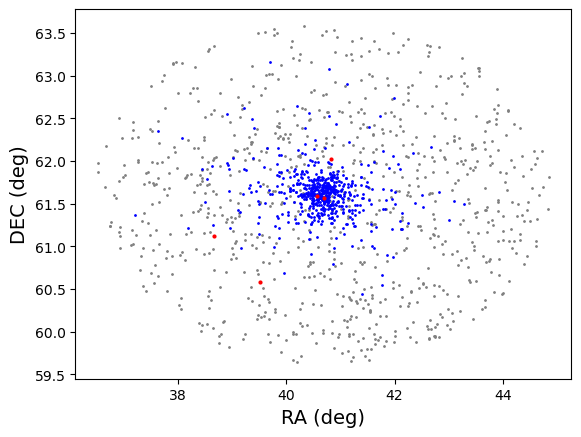

In [53]:
fig, ax = plt.subplots()

ax.scatter(p4_5p.RA_ICRS, p4_5p.DE_ICRS, s=1, c='grey')
ax.scatter(dfvg.RA_ICRS, dfvg.DE_ICRS, s=1, c='b')
ax.scatter(p4_5p.iloc[matched_idx_catalog1].RA_ICRS, p4_5p.iloc[matched_idx_catalog1].DE_ICRS, s=4, c='r')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
# ax.set_ylim(-11.5,-14.2)
# ax.set_xlim(121.2,124.5)

In [54]:
dfvg_t = len(dfvg)
p4_5p_t = len(p4_5p.iloc[matched_idx_catalog1])

Completeness


In [71]:
p4_5p_c = p4_5p_t /dfvg_t
p4_5p_c*100

0.8375209380234505

Pureness

In [72]:
p4_5p_p = p4_5p_t/len(p4_5p)
p4_5p_p*100

0.5882352941176471

### Population 5

In [57]:
ra1 = p5_5p.RA_ICRS
dec1 = p5_5p.DE_ICRS

ra2 = dfvg.RA_ICRS
dec2 = dfvg.DE_ICRS

In [58]:
#Catalogue from my work with GMM
catalog1 = SkyCoord(ra=ra1, dec=dec1, unit='degree')
#Catalogue from vG+2023
catalog2 = SkyCoord(ra=ra2, dec=dec2, unit='degree')

In [59]:
idx, d2d, d3d = catalog1.match_to_catalog_sky(catalog2)

In [60]:
max_sep = 1.0 * u.arcsec  # Exemplo de separacao limite de 1 segundo de arco
matches = d2d < max_sep

# Selecionar apenas correspondências válidas
matched_idx = idx[matches]
matched_d2d = d2d[matches]

In [61]:
matched_idx_catalog1 = np.where(matches)[0]
matched_idx_catalog2 = idx[matches]

In [62]:
p5_5p.iloc[matched_idx_catalog1]


,RA_ICRS,DE_ICRS,Source,Plx,e_Plx,PM,pmRA,pmDE,Solved,nueff,...,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr,cluster
59,38.918833,62.556119,465979934159829632,0.8259,0.0822,2.616,-1.787,1.910,31,1.384,...,17.430868,18.262980,16.540613,1.722366,NaN,44.351752,38.918851,62.556110,0.857368,4
70,40.210357,62.642312,466015878748329472,0.8509,0.0601,2.964,-2.047,2.144,31,1.390,...,16.760485,17.562668,15.887145,1.675523,NaN,44.175138,40.210376,62.642302,0.881371,4
104,39.368128,62.490349,466057728911784448,0.9044,0.0256,2.856,-2.004,2.034,31,1.451,...,15.149142,15.735953,14.405804,1.330150,NaN,44.203078,39.368148,62.490340,0.937237,4
127,39.226658,62.617307,466071434144149120,0.9070,0.0485,2.808,-1.993,1.979,31,1.414,...,16.447214,17.155657,15.630446,1.525211,NaN,44.345737,39.226677,62.617298,0.936223,4
204,39.696708,63.156088,466112807573205248,0.9259,0.0314,2.759,-1.952,1.950,31,1.460,...,15.738831,16.299076,15.020844,1.278232,NaN,44.739631,39.696727,63.156079,0.958138,4
234,41.114886,62.905429,467535884855567872,0.9308,0.0180,2.818,-1.936,2.048,31,1.433,...,8.369972,9.017055,7.584709,1.432346,-43.63,44.239616,41.114905,62.905420,0.959092,4
250,40.787290,63.076067,467553236523330816,0.8373,0.0654,2.841,-1.898,2.113,31,1.412,...,16.967535,17.682224,16.119755,1.562469,NaN,44.456967,40.787309,63.076058,0.867127,4
425,38.075159,62.268499,513984032015800064,0.8460,0.0231,2.857,-1.970,2.068,31,1.488,...,14.957641,15.442095,14.297846,1.144249,NaN,44.262748,38.075178,62.268490,0.878511,4
454,37.636500,62.354826,513994855333356032,0.8722,0.0275,2.795,-1.879,2.069,31,1.473,...,15.347439,15.870675,14.657360,1.213315,NaN,44.429820,37.636518,62.354817,0.904588,4


In [63]:
dfvg.iloc[matched_idx_catalog2]

,Cluster,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,Pmemb
856,NGC_1027,465979934159829632,38.918833,62.556119,0.8259,-1.787,1.910,17.430868,18.262980,16.540613,0.77
1009,NGC_1027,466015878748329472,40.210357,62.642312,0.8509,-2.047,2.144,16.760485,17.562668,15.887145,0.95
1092,NGC_1027,466057728911784448,39.368128,62.490349,0.9044,-2.004,2.034,15.149142,15.735953,14.405804,1.00
1100,NGC_1027,466071434144149120,39.226658,62.617307,0.9070,-1.993,1.979,16.447214,17.155657,15.630446,0.99
71,NGC_1027,466112807573205248,39.696708,63.156088,0.9259,-1.952,1.950,15.738831,16.299076,15.020844,0.83
72,NGC_1027,467535884855567872,41.114886,62.905429,0.9308,-1.936,2.048,8.369972,9.017055,7.584709,1.00
1083,NGC_1027,467553236523330816,40.787290,63.076067,0.8373,-1.898,2.113,16.967535,17.682224,16.119755,0.88
160,NGC_1027,513984032015800064,38.075159,62.268499,0.8460,-1.970,2.068,14.957641,15.442095,14.297846,0.98
195,NGC_1027,513994855333356032,37.636500,62.354826,0.8722,-1.879,2.069,15.347439,15.870675,14.657360,0.99


Text(0, 0.5, 'DEC (deg)')

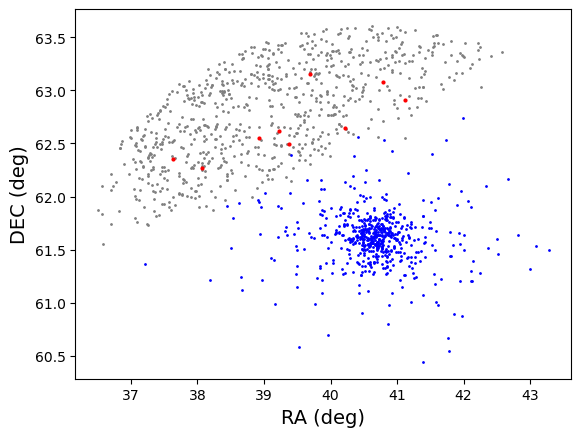

In [64]:
fig, ax = plt.subplots()

ax.scatter(p5_5p.RA_ICRS, p5_5p.DE_ICRS, s=1, c='grey')
ax.scatter(dfvg.RA_ICRS, dfvg.DE_ICRS, s=1, c='b')
ax.scatter(p5_5p.iloc[matched_idx_catalog1].RA_ICRS, p5_5p.iloc[matched_idx_catalog1].DE_ICRS, s=4, c='r')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
# ax.set_ylim(-11.5,-14.2)
# ax.set_xlim(121.2,124.5)

In [65]:
dfvg_t = len(dfvg)
p5_5p_t = len(p5_5p.iloc[matched_idx_catalog1])

Completeness


In [66]:
p5_5p_c = p5_5p_t /dfvg_t
p5_5p_c*100

1.507537688442211

Pureness

In [67]:
p5_5p_p = p5_5p_t/len(p5_5p)
p5_5p_p*100

1.1904761904761905

## Analyzing

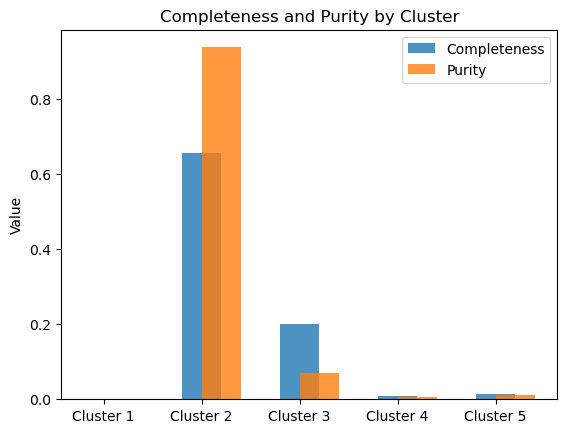

In [75]:
import seaborn as sns

# Dados simulados: completude e pureza por cluster
clusters = [1, 2, 3, 4, 5]
completeness = [p1_5p_c, p2_5p_c, p3_5p_c, p4_5p_c, p5_5p_c]  # Exemplo de completude
purity = [p1_5p_p, p2_5p_p, p3_5p_p, p4_5p_p, p5_5p_p]  # Exemplo de pureza

# Bar plot
x = range(len(clusters))
plt.bar(x, completeness, width=0.4, label="Completeness", alpha=0.8, align='center')
plt.bar(x, purity, width=0.4, label="Purity", alpha=0.8, align='edge')

plt.xticks(x, [f"Cluster {c}" for c in clusters])
plt.ylabel("Value")
plt.title("Completeness and Purity by Cluster")
plt.legend()
plt.show()

# 4 Populations

In [76]:
p1_4p = pd.read_csv('Catalogues/pop1_NGC1027_GMM1_4populations.csv')
p2_4p = pd.read_csv('Catalogues/pop2_NGC1027_GMM1_4populations.csv')
p3_4p = pd.read_csv('Catalogues/pop3_NGC1027_GMM1_4populations.csv')
p4_4p = pd.read_csv('Catalogues/pop4_NGC1027_GMM1_4populations.csv')

## Computing Completeness and Purity

### Population 1

In [77]:
ra1 = p1_4p.RA_ICRS
dec1 = p1_4p.DE_ICRS

ra2 = dfvg.RA_ICRS
dec2 = dfvg.DE_ICRS

In [78]:
#Catalogue from my work with GMM
catalog1 = SkyCoord(ra=ra1, dec=dec1, unit='degree')
#Catalogue from vG+2023
catalog2 = SkyCoord(ra=ra2, dec=dec2, unit='degree')

In [79]:
idx, d2d, d3d = catalog1.match_to_catalog_sky(catalog2)

In [80]:
max_sep = 1.0 * u.arcsec  # Exemplo de separacao limite de 1 segundo de arco
matches = d2d < max_sep

# Selecionar apenas correspondências válidas
matched_idx = idx[matches]
matched_d2d = d2d[matches]

In [81]:
matched_idx_catalog1 = np.where(matches)[0]
matched_idx_catalog2 = idx[matches]

In [82]:
p1_4p.iloc[matched_idx_catalog1]


,RA_ICRS,DE_ICRS,Source,Plx,e_Plx,PM,pmRA,pmDE,Solved,nueff,...,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr,cluster
236,41.773826,60.540374,464776037646911104,0.8545,0.1063,2.811,-1.799,2.160,31,1.362,...,17.921892,18.853360,16.956484,1.896875,NaN,41.953426,41.773842,60.540364,0.882463,0
258,41.391974,60.440972,464797963461759488,0.8665,0.0250,2.589,-1.793,1.868,31,1.439,...,15.092919,15.710403,14.297459,1.412945,NaN,41.937564,41.391990,60.440964,0.900277,0
294,41.760686,60.667446,464824798418117120,0.9060,0.0240,2.491,-1.459,2.020,31,1.451,...,15.022243,15.609508,14.280652,1.328855,NaN,42.072503,41.760699,60.667437,0.939593,0
302,41.971368,60.869426,464833766309733248,0.8965,0.0135,2.625,-1.530,2.133,31,1.545,...,13.546622,13.889764,13.031779,0.857985,NaN,42.216559,41.971382,60.869417,0.930231,0
309,41.851684,60.892326,464836652527754368,0.9197,0.0136,2.608,-1.809,1.878,31,1.540,...,12.826741,13.182690,12.293089,0.889601,NaN,42.260835,41.851700,60.892318,0.941174,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1887,40.929175,62.430013,466019207341152256,0.9167,0.0369,2.785,-2.045,1.891,31,1.425,...,15.846997,16.483763,14.985683,1.498079,NaN,43.843213,40.929195,62.430005,0.949817,0
1899,40.799686,62.532005,466023644050466560,0.9817,0.0642,2.630,-1.725,1.986,31,1.393,...,17.081020,17.874979,16.217472,1.657507,NaN,43.960869,40.799703,62.531996,1.012394,0
1912,40.418877,62.564527,466034982764139008,0.9564,0.0162,2.989,-1.798,2.388,31,1.530,...,13.865103,14.244426,13.308497,0.935928,NaN,44.064098,40.418894,62.564516,0.989366,0
2231,42.672829,62.162159,467252240914244480,0.9654,0.0409,2.769,-1.700,2.186,31,1.426,...,16.238014,16.906803,15.442007,1.464796,NaN,43.267141,42.672845,62.162149,0.994258,0


In [83]:
dfvg.iloc[matched_idx_catalog2]

,Cluster,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,Pmemb
399,NGC_1027,464776037646911104,41.773826,60.540374,0.8545,-1.799,2.160,17.921892,18.853360,16.956484,0.79
479,NGC_1027,464797963461759488,41.391974,60.440972,0.8665,-1.793,1.868,15.092919,15.710403,14.297459,0.99
307,NGC_1027,464824798418117120,41.760686,60.667446,0.9060,-1.459,2.020,15.022243,15.609508,14.280652,0.99
289,NGC_1027,464833766309733248,41.971368,60.869426,0.8965,-1.530,2.133,13.546622,13.889764,13.031779,1.00
293,NGC_1027,464836652527754368,41.851684,60.892326,0.9197,-1.809,1.878,12.826741,13.182690,12.293089,1.00
...,...,...,...,...,...,...,...,...,...,...,...
1131,NGC_1027,466019207341152256,40.929175,62.430013,0.9167,-2.045,1.891,15.846997,16.483763,14.985683,1.00
1140,NGC_1027,466023644050466560,40.799686,62.532005,0.9817,-1.725,1.986,17.081020,17.874979,16.217472,0.95
1097,NGC_1027,466034982764139008,40.418877,62.564527,0.9564,-1.798,2.388,13.865103,14.244426,13.308497,1.00
406,NGC_1027,467252240914244480,42.672829,62.162159,0.9654,-1.700,2.186,16.238014,16.906803,15.442007,1.00


Text(0, 0.5, 'DEC (deg)')

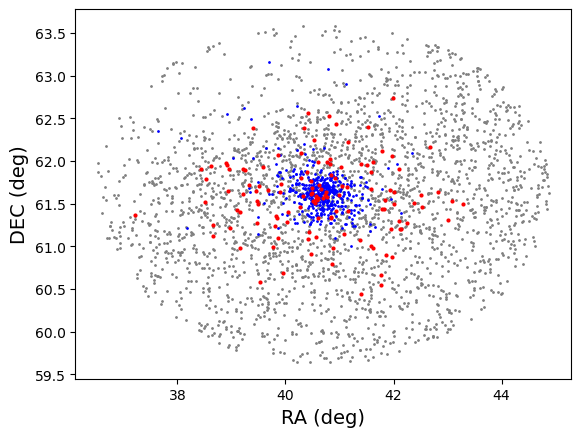

In [85]:
fig, ax = plt.subplots()

ax.scatter(p1_4p.RA_ICRS, p1_4p.DE_ICRS, s=1, c='grey')
ax.scatter(dfvg.RA_ICRS, dfvg.DE_ICRS, s=1, c='b')
ax.scatter(p1_4p.iloc[matched_idx_catalog1].RA_ICRS, p1_4p.iloc[matched_idx_catalog1].DE_ICRS, s=4, c='r')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
# ax.set_ylim(-11.5,-14.2)
# ax.set_xlim(121.2,124.5)

In [86]:
dfvg_t = len(dfvg)
p1_4p_t = len(p1_4p.iloc[matched_idx_catalog1])

Completeness


In [87]:
p1_4p_c = p1_4p_t /dfvg_t
p1_4p_c*100

20.938023450586265

Pureness

In [88]:
p1_4p_p = p1_4p_t/len(p1_4p)
p1_4p_p*100

4.85248447204969

### Population 2

In [89]:
ra1 = p2_4p.RA_ICRS
dec1 = p2_4p.DE_ICRS

ra2 = dfvg.RA_ICRS
dec2 = dfvg.DE_ICRS

In [90]:
#Catalogue from my work with GMM
catalog1 = SkyCoord(ra=ra1, dec=dec1, unit='degree')
#Catalogue from vG+2023
catalog2 = SkyCoord(ra=ra2, dec=dec2, unit='degree')

In [91]:
idx, d2d, d3d = catalog1.match_to_catalog_sky(catalog2)

In [92]:
max_sep = 1.0 * u.arcsec  # Exemplo de separacao limite de 1 segundo de arco
matches = d2d < max_sep

# Selecionar apenas correspondências válidas
matched_idx = idx[matches]
matched_d2d = d2d[matches]

In [93]:
matched_idx_catalog1 = np.where(matches)[0]
matched_idx_catalog2 = idx[matches]

In [94]:
p2_4p

,RA_ICRS,DE_ICRS,Source,Plx,e_Plx,PM,pmRA,pmDE,Solved,nueff,...,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr,cluster
0,39.647611,59.684392,464386982329567360,0.8802,0.3159,2.466,-2.455,0.226,95,NaN,...,19.534328,20.699130,18.477707,2.221422,NaN,41.598864,39.647633,59.684391,0.907406,1
1,39.763363,59.737279,464387948703133952,1.0608,0.0189,3.385,-3.296,0.773,31,1.438,...,14.241471,14.869780,13.469664,1.400116,NaN,41.623222,39.763393,59.737275,1.095059,1
2,39.965729,59.894380,464395129885345920,0.8628,2.6752,3.105,-3.093,0.268,95,NaN,...,20.881147,21.218784,19.570877,1.647907,NaN,41.725010,39.965756,59.894379,0.904626,1
3,39.994756,59.923429,464396710432723456,1.0592,0.6399,2.510,-2.487,0.338,95,NaN,...,20.309158,21.270416,19.235008,2.035408,NaN,41.745581,39.994778,59.923427,1.096877,1
4,40.000418,60.037749,464398492844296320,0.8939,0.4377,2.315,-2.302,0.252,95,NaN,...,19.857098,21.008509,18.848642,2.159866,NaN,41.848756,40.000439,60.037747,0.921608,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,38.658009,62.512326,514017292237038464,0.9486,0.7466,0.840,-0.776,0.321,95,NaN,...,20.440180,21.293486,18.326220,2.967266,NaN,44.364457,38.658016,62.512324,0.992109,1
354,38.487931,62.953880,514132771020653696,0.9652,0.2372,1.120,-0.887,0.685,31,1.293,...,19.132385,20.399588,18.025318,2.374270,NaN,44.795720,38.487939,62.953877,0.983021,1
355,38.502225,62.955904,514132771021851904,0.9787,0.4093,1.807,-1.789,0.257,95,NaN,...,19.875214,20.918705,18.664207,2.254497,NaN,44.794687,38.502243,62.955902,1.008155,1
356,38.595540,63.274206,514146175612583936,1.0098,0.3722,1.831,-1.751,0.534,95,NaN,...,19.681800,20.795403,18.153940,2.641462,NaN,45.062074,38.595557,63.274204,1.036017,1


In [95]:
p2_4p.iloc[matched_idx_catalog1]


,RA_ICRS,DE_ICRS,Source,Plx,e_Plx,PM,pmRA,pmDE,Solved,nueff,...,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr,cluster


In [96]:
dfvg.iloc[matched_idx_catalog2]

,Cluster,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,Pmemb


Text(0, 0.5, 'DEC (deg)')

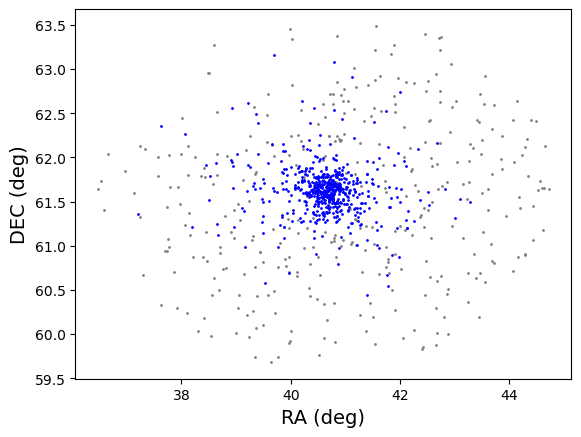

In [97]:
fig, ax = plt.subplots()

ax.scatter(p2_4p.RA_ICRS, p2_4p.DE_ICRS, s=1, c='grey')
ax.scatter(dfvg.RA_ICRS, dfvg.DE_ICRS, s=1, c='b')
ax.scatter(p2_4p.iloc[matched_idx_catalog1].RA_ICRS, p2_4p.iloc[matched_idx_catalog1].DE_ICRS, s=4, c='r')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
# ax.set_ylim(-11.5,-14.2)
# ax.set_xlim(121.2,124.5)

In [98]:
dfvg_t = len(dfvg)
p2_4p_t = len(p2_4p.iloc[matched_idx_catalog1])

Completeness


In [99]:
p2_4p_c = p2_4p_t /dfvg_t
p2_4p_c*100

0.0

Pureness

In [100]:
p2_4p_p = p2_4p_t/len(p2_4p)
p2_4p_p*100

0.0

### Population 3

In [101]:
ra1 = p3_4p.RA_ICRS
dec1 = p3_4p.DE_ICRS

ra2 = dfvg.RA_ICRS
dec2 = dfvg.DE_ICRS

In [102]:
#Catalogue from my work with GMM
catalog1 = SkyCoord(ra=ra1, dec=dec1, unit='degree')
#Catalogue from vG+2023
catalog2 = SkyCoord(ra=ra2, dec=dec2, unit='degree')

In [103]:
idx, d2d, d3d = catalog1.match_to_catalog_sky(catalog2)

In [104]:
max_sep = 1.0 * u.arcsec  # Exemplo de separacao limite de 1 segundo de arco
matches = d2d < max_sep

# Selecionar apenas correspondências válidas
matched_idx = idx[matches]
matched_d2d = d2d[matches]

In [105]:
matched_idx_catalog1 = np.where(matches)[0]
matched_idx_catalog2 = idx[matches]

In [106]:
p3_4p.iloc[matched_idx_catalog1]


,RA_ICRS,DE_ICRS,Source,Plx,e_Plx,PM,pmRA,pmDE,Solved,nueff,...,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr,cluster
59,38.918833,62.556119,465979934159829632,0.8259,0.0822,2.616,-1.787,1.910,31,1.384,...,17.430868,18.262980,16.540613,1.722366,NaN,44.351752,38.918851,62.556110,0.857368,2
70,40.210357,62.642312,466015878748329472,0.8509,0.0601,2.964,-2.047,2.144,31,1.390,...,16.760485,17.562668,15.887145,1.675523,NaN,44.175138,40.210376,62.642302,0.881371,2
104,39.368128,62.490349,466057728911784448,0.9044,0.0256,2.856,-2.004,2.034,31,1.451,...,15.149142,15.735953,14.405804,1.330150,NaN,44.203078,39.368148,62.490340,0.937237,2
127,39.226658,62.617307,466071434144149120,0.9070,0.0485,2.808,-1.993,1.979,31,1.414,...,16.447214,17.155657,15.630446,1.525211,NaN,44.345737,39.226677,62.617298,0.936223,2
204,39.696708,63.156088,466112807573205248,0.9259,0.0314,2.759,-1.952,1.950,31,1.460,...,15.738831,16.299076,15.020844,1.278232,NaN,44.739631,39.696727,63.156079,0.958138,2
234,41.114886,62.905429,467535884855567872,0.9308,0.0180,2.818,-1.936,2.048,31,1.433,...,8.369972,9.017055,7.584709,1.432346,-43.63,44.239616,41.114905,62.905420,0.959092,2
250,40.787290,63.076067,467553236523330816,0.8373,0.0654,2.841,-1.898,2.113,31,1.412,...,16.967535,17.682224,16.119755,1.562469,NaN,44.456967,40.787309,63.076058,0.867127,2
425,38.075159,62.268499,513984032015800064,0.8460,0.0231,2.857,-1.970,2.068,31,1.488,...,14.957641,15.442095,14.297846,1.144249,NaN,44.262748,38.075178,62.268490,0.878511,2
454,37.636500,62.354826,513994855333356032,0.8722,0.0275,2.795,-1.879,2.069,31,1.473,...,15.347439,15.870675,14.657360,1.213315,NaN,44.429820,37.636518,62.354817,0.904588,2


In [107]:
dfvg.iloc[matched_idx_catalog2]

,Cluster,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,Pmemb
856,NGC_1027,465979934159829632,38.918833,62.556119,0.8259,-1.787,1.910,17.430868,18.262980,16.540613,0.77
1009,NGC_1027,466015878748329472,40.210357,62.642312,0.8509,-2.047,2.144,16.760485,17.562668,15.887145,0.95
1092,NGC_1027,466057728911784448,39.368128,62.490349,0.9044,-2.004,2.034,15.149142,15.735953,14.405804,1.00
1100,NGC_1027,466071434144149120,39.226658,62.617307,0.9070,-1.993,1.979,16.447214,17.155657,15.630446,0.99
71,NGC_1027,466112807573205248,39.696708,63.156088,0.9259,-1.952,1.950,15.738831,16.299076,15.020844,0.83
72,NGC_1027,467535884855567872,41.114886,62.905429,0.9308,-1.936,2.048,8.369972,9.017055,7.584709,1.00
1083,NGC_1027,467553236523330816,40.787290,63.076067,0.8373,-1.898,2.113,16.967535,17.682224,16.119755,0.88
160,NGC_1027,513984032015800064,38.075159,62.268499,0.8460,-1.970,2.068,14.957641,15.442095,14.297846,0.98
195,NGC_1027,513994855333356032,37.636500,62.354826,0.8722,-1.879,2.069,15.347439,15.870675,14.657360,0.99


Text(0, 0.5, 'DEC (deg)')

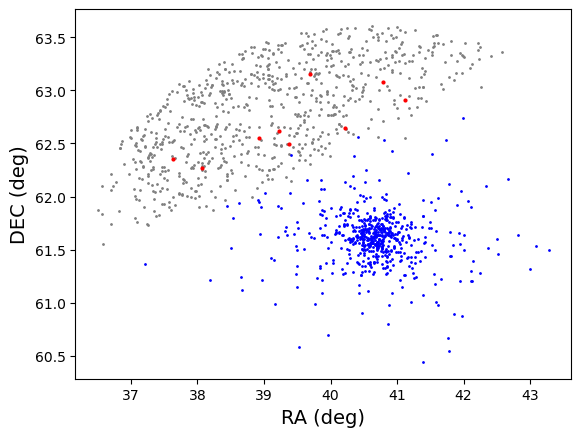

In [108]:
fig, ax = plt.subplots()

ax.scatter(p3_4p.RA_ICRS, p3_4p.DE_ICRS, s=1, c='grey')
ax.scatter(dfvg.RA_ICRS, dfvg.DE_ICRS, s=1, c='b')
ax.scatter(p3_4p.iloc[matched_idx_catalog1].RA_ICRS, p3_4p.iloc[matched_idx_catalog1].DE_ICRS, s=4, c='r')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
# ax.set_ylim(-11.5,-14.2)
# ax.set_xlim(121.2,124.5)

In [109]:
dfvg_t = len(dfvg)
p3_4p_t = len(p3_4p.iloc[matched_idx_catalog1])

Completeness


In [110]:
p3_4p_c = p3_4p_t /dfvg_t
p3_4p_c*100

1.507537688442211

Pureness

In [111]:
p3_4p_p = p3_4p_t/len(p3_4p)
p3_4p_p*100

1.1904761904761905

### Population 4

In [112]:
ra1 = p4_4p.RA_ICRS
dec1 = p4_4p.DE_ICRS

ra2 = dfvg.RA_ICRS
dec2 = dfvg.DE_ICRS

In [113]:
#Catalogue from my work with GMM
catalog1 = SkyCoord(ra=ra1, dec=dec1, unit='degree')
#Catalogue from vG+2023
catalog2 = SkyCoord(ra=ra2, dec=dec2, unit='degree')

In [114]:
idx, d2d, d3d = catalog1.match_to_catalog_sky(catalog2)

In [115]:
max_sep = 1.0 * u.arcsec  # Exemplo de separacao limite de 1 segundo de arco
matches = d2d < max_sep

# Selecionar apenas correspondências válidas
matched_idx = idx[matches]
matched_d2d = d2d[matches]

In [116]:
matched_idx_catalog1 = np.where(matches)[0]
matched_idx_catalog2 = idx[matches]

In [117]:
p4_4p.iloc[matched_idx_catalog1]


,RA_ICRS,DE_ICRS,Source,Plx,e_Plx,PM,pmRA,pmDE,Solved,nueff,...,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr,cluster
0,41.570274,61.173409,464949661706849280,0.8300,0.0378,2.577,-1.596,2.023,31,1.440,...,16.192581,16.815716,15.430469,1.385247,NaN,42.572996,41.570289,61.173400,0.858649,3
1,41.654500,61.223746,464950211462625792,0.9554,0.0447,2.603,-1.741,1.936,31,1.433,...,16.519371,17.166830,15.747625,1.419205,NaN,42.602652,41.654516,61.223737,0.984442,3
2,42.138625,61.394109,464956361855632896,0.8718,0.0169,2.700,-1.764,2.044,31,1.610,...,11.991033,12.207760,11.621119,0.586641,-67.03,42.665070,42.138641,61.394100,0.911275,3
3,41.209813,61.006434,465597755092954240,0.8735,0.0226,2.731,-1.759,2.089,31,1.467,...,14.797569,15.339229,14.089526,1.249702,NaN,42.490896,41.209829,61.006425,0.906890,3
5,40.922414,61.094239,465602702895244800,0.9349,0.0354,2.764,-1.855,2.050,31,1.455,...,15.765883,16.284992,14.968859,1.316134,NaN,42.627734,40.922431,61.094230,0.967899,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,39.393160,62.037031,465901289021026048,0.8896,0.0225,2.970,-2.030,2.167,31,1.464,...,14.832691,15.384083,14.117809,1.266274,NaN,43.788269,39.393179,62.037021,0.922578,3
414,39.648913,62.152402,465909294840009728,0.8991,0.0144,2.786,-1.944,1.996,31,1.554,...,13.535378,13.855075,13.034800,0.820275,NaN,43.841792,39.648931,62.152393,0.932254,3
415,40.356277,62.084900,465984336508841088,0.9350,0.0698,2.723,-1.865,1.984,31,1.407,...,17.112860,17.850330,16.284063,1.566267,NaN,43.641074,40.356295,62.084891,0.965201,3
416,40.516560,62.135372,465984748825655424,0.8318,0.0223,3.015,-2.007,2.251,31,1.498,...,14.682241,15.133806,14.042489,1.091317,-24.84,43.655545,40.516579,62.135362,0.864589,3


In [118]:
dfvg.iloc[matched_idx_catalog2]

,Cluster,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,Pmemb
5,NGC_1027,464949661706849280,41.570274,61.173409,0.8300,-1.596,2.023,16.192581,16.815716,15.430469,1.0
3,NGC_1027,464950211462625792,41.654500,61.223746,0.9554,-1.741,1.936,16.519371,17.166830,15.747625,1.0
92,NGC_1027,464956361855632896,42.138625,61.394109,0.8718,-1.764,2.044,11.991033,12.207760,11.621119,1.0
939,NGC_1027,465597755092954240,41.209813,61.006434,0.8735,-1.759,2.089,14.797569,15.339229,14.089526,1.0
794,NGC_1027,465602702895244800,40.922414,61.094239,0.9349,-1.855,2.050,15.765883,16.284992,14.968859,1.0
...,...,...,...,...,...,...,...,...,...,...,...
874,NGC_1027,465901289021026048,39.393160,62.037031,0.8896,-2.030,2.167,14.832691,15.384083,14.117809,1.0
857,NGC_1027,465909294840009728,39.648913,62.152402,0.8991,-1.944,1.996,13.535378,13.855075,13.034800,1.0
564,NGC_1027,465984336508841088,40.356277,62.084900,0.9350,-1.865,1.984,17.112860,17.850330,16.284063,1.0
561,NGC_1027,465984748825655424,40.516560,62.135372,0.8318,-2.007,2.251,14.682241,15.133806,14.042489,1.0


Text(0, 0.5, 'DEC (deg)')

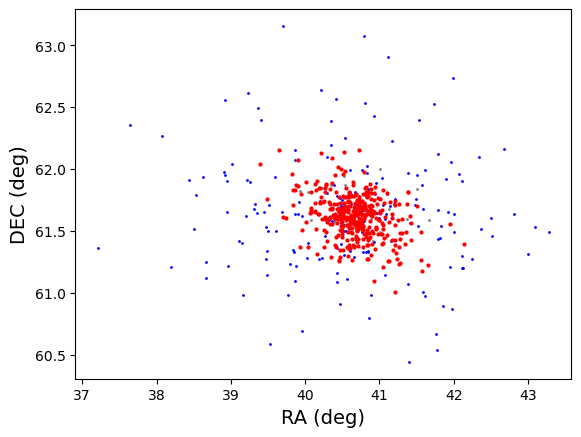

In [120]:
fig, ax = plt.subplots()

ax.scatter(p4_4p.RA_ICRS, p4_4p.DE_ICRS, s=1, c='grey')
ax.scatter(dfvg.RA_ICRS, dfvg.DE_ICRS, s=1, c='b')
ax.scatter(p4_4p.iloc[matched_idx_catalog1].RA_ICRS, p4_4p.iloc[matched_idx_catalog1].DE_ICRS, s=4, c='r')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
# ax.set_ylim(-11.5,-14.2)
# ax.set_xlim(121.2,124.5)

In [121]:
dfvg_t = len(dfvg)
p4_4p_t = len(p4_4p.iloc[matched_idx_catalog1])

Completeness


In [124]:
p4_4p_c = p4_4p_t /dfvg_t
p4_4p_c*100

65.66164154103853

Pureness

In [125]:
p4_4p_p = p4_4p_t/len(p4_4p)
p4_4p_p*100

93.77990430622009

## Analyzing

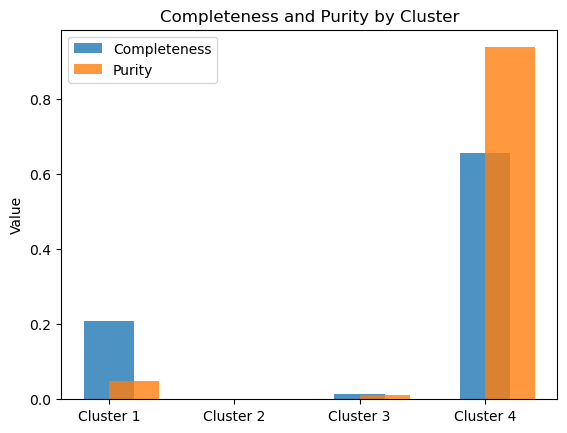

In [126]:
import seaborn as sns

# Dados simulados: completude e pureza por cluster
clusters = [1, 2, 3, 4]
completeness = [p1_4p_c, p2_4p_c, p3_4p_c, p4_4p_c]  # Exemplo de completude
purity = [p1_4p_p, p2_4p_p, p3_4p_p, p4_4p_p]  # Exemplo de pureza

# Bar plot
x = range(len(clusters))
plt.bar(x, completeness, width=0.4, label="Completeness", alpha=0.8, align='center')
plt.bar(x, purity, width=0.4, label="Purity", alpha=0.8, align='edge')

plt.xticks(x, [f"Cluster {c}" for c in clusters])
plt.ylabel("Value")
plt.title("Completeness and Purity by Cluster")
plt.legend()
plt.show()

# 3 Populations

In [127]:
p1_3p = pd.read_csv('Catalogues/pop1_NGC1027_GMM1_3populations.csv')
p2_3p = pd.read_csv('Catalogues/pop2_NGC1027_GMM1_3populations.csv')
p3_3p = pd.read_csv('Catalogues/pop3_NGC1027_GMM1_3populations.csv')

## Computing Completeness and Purity

### Population 1

In [128]:
ra1 = p1_3p.RA_ICRS
dec1 = p1_3p.DE_ICRS

ra2 = dfvg.RA_ICRS
dec2 = dfvg.DE_ICRS

In [129]:
#Catalogue from my work with GMM
catalog1 = SkyCoord(ra=ra1, dec=dec1, unit='degree')
#Catalogue from vG+2023
catalog2 = SkyCoord(ra=ra2, dec=dec2, unit='degree')

In [130]:
idx, d2d, d3d = catalog1.match_to_catalog_sky(catalog2)

In [131]:
max_sep = 1.0 * u.arcsec  # Exemplo de separacao limite de 1 segundo de arco
matches = d2d < max_sep

# Selecionar apenas correspondências válidas
matched_idx = idx[matches]
matched_d2d = d2d[matches]

In [132]:
matched_idx_catalog1 = np.where(matches)[0]
matched_idx_catalog2 = idx[matches]

In [133]:
p1_3p.iloc[matched_idx_catalog1]


,RA_ICRS,DE_ICRS,Source,Plx,e_Plx,PM,pmRA,pmDE,Solved,nueff,...,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr,cluster


In [134]:
dfvg.iloc[matched_idx_catalog2]

,Cluster,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,Pmemb


Text(0, 0.5, 'DEC (deg)')

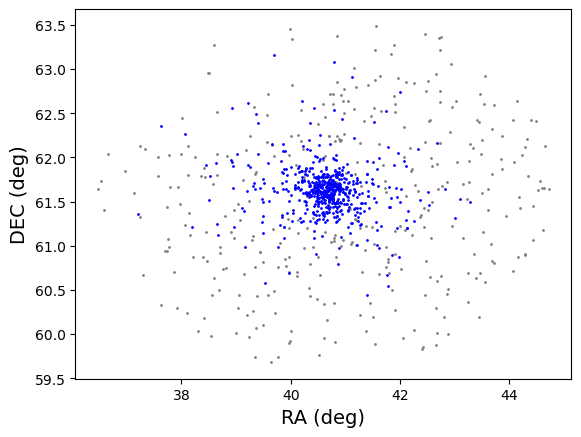

In [136]:
fig, ax = plt.subplots()

ax.scatter(p1_3p.RA_ICRS, p1_3p.DE_ICRS, s=1, c='grey')
ax.scatter(dfvg.RA_ICRS, dfvg.DE_ICRS, s=1, c='b')
ax.scatter(p1_3p.iloc[matched_idx_catalog1].RA_ICRS, p1_3p.iloc[matched_idx_catalog1].DE_ICRS, s=4, c='r')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
# ax.set_ylim(-11.5,-14.2)
# ax.set_xlim(121.2,124.5)

In [137]:
dfvg_t = len(dfvg)
p1_3p_t = len(p1_3p.iloc[matched_idx_catalog1])

Completeness


In [138]:
p1_3p_c = p1_3p_t /dfvg_t
p1_3p_c*100

0.0

Pureness

In [139]:
p1_3p_p = p1_3p_t/len(p1_3p)
p1_3p_p*100

0.0

### Population 2

In [140]:
ra1 = p2_3p.RA_ICRS
dec1 = p2_3p.DE_ICRS

ra2 = dfvg.RA_ICRS
dec2 = dfvg.DE_ICRS

In [141]:
#Catalogue from my work with GMM
catalog1 = SkyCoord(ra=ra1, dec=dec1, unit='degree')
#Catalogue from vG+2023
catalog2 = SkyCoord(ra=ra2, dec=dec2, unit='degree')

In [142]:
idx, d2d, d3d = catalog1.match_to_catalog_sky(catalog2)

In [143]:
max_sep = 1.0 * u.arcsec  # Exemplo de separacao limite de 1 segundo de arco
matches = d2d < max_sep

# Selecionar apenas correspondências válidas
matched_idx = idx[matches]
matched_d2d = d2d[matches]

In [144]:
matched_idx_catalog1 = np.where(matches)[0]
matched_idx_catalog2 = idx[matches]

In [145]:
p2_3p.iloc[matched_idx_catalog1]


,RA_ICRS,DE_ICRS,Source,Plx,e_Plx,PM,pmRA,pmDE,Solved,nueff,...,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr,cluster
236,41.773826,60.540374,464776037646911104,0.8545,0.1063,2.811,-1.799,2.160,31,1.362,...,17.921892,18.853360,16.956484,1.896875,NaN,41.953426,41.773842,60.540364,0.882463,1
258,41.391974,60.440972,464797963461759488,0.8665,0.0250,2.589,-1.793,1.868,31,1.439,...,15.092919,15.710403,14.297459,1.412945,NaN,41.937564,41.391990,60.440964,0.900277,1
294,41.760686,60.667446,464824798418117120,0.9060,0.0240,2.491,-1.459,2.020,31,1.451,...,15.022243,15.609508,14.280652,1.328855,NaN,42.072503,41.760699,60.667437,0.939593,1
302,41.971368,60.869426,464833766309733248,0.8965,0.0135,2.625,-1.530,2.133,31,1.545,...,13.546622,13.889764,13.031779,0.857985,NaN,42.216559,41.971382,60.869417,0.930231,1
309,41.851684,60.892326,464836652527754368,0.9197,0.0136,2.608,-1.809,1.878,31,1.540,...,12.826741,13.182690,12.293089,0.889601,NaN,42.260835,41.851700,60.892318,0.941174,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1887,40.929175,62.430013,466019207341152256,0.9167,0.0369,2.785,-2.045,1.891,31,1.425,...,15.846997,16.483763,14.985683,1.498079,NaN,43.843213,40.929195,62.430005,0.949817,1
1899,40.799686,62.532005,466023644050466560,0.9817,0.0642,2.630,-1.725,1.986,31,1.393,...,17.081020,17.874979,16.217472,1.657507,NaN,43.960869,40.799703,62.531996,1.012394,1
1912,40.418877,62.564527,466034982764139008,0.9564,0.0162,2.989,-1.798,2.388,31,1.530,...,13.865103,14.244426,13.308497,0.935928,NaN,44.064098,40.418894,62.564516,0.989366,1
2231,42.672829,62.162159,467252240914244480,0.9654,0.0409,2.769,-1.700,2.186,31,1.426,...,16.238014,16.906803,15.442007,1.464796,NaN,43.267141,42.672845,62.162149,0.994258,1


In [146]:
dfvg.iloc[matched_idx_catalog2]

,Cluster,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,Pmemb
399,NGC_1027,464776037646911104,41.773826,60.540374,0.8545,-1.799,2.160,17.921892,18.853360,16.956484,0.79
479,NGC_1027,464797963461759488,41.391974,60.440972,0.8665,-1.793,1.868,15.092919,15.710403,14.297459,0.99
307,NGC_1027,464824798418117120,41.760686,60.667446,0.9060,-1.459,2.020,15.022243,15.609508,14.280652,0.99
289,NGC_1027,464833766309733248,41.971368,60.869426,0.8965,-1.530,2.133,13.546622,13.889764,13.031779,1.00
293,NGC_1027,464836652527754368,41.851684,60.892326,0.9197,-1.809,1.878,12.826741,13.182690,12.293089,1.00
...,...,...,...,...,...,...,...,...,...,...,...
1131,NGC_1027,466019207341152256,40.929175,62.430013,0.9167,-2.045,1.891,15.846997,16.483763,14.985683,1.00
1140,NGC_1027,466023644050466560,40.799686,62.532005,0.9817,-1.725,1.986,17.081020,17.874979,16.217472,0.95
1097,NGC_1027,466034982764139008,40.418877,62.564527,0.9564,-1.798,2.388,13.865103,14.244426,13.308497,1.00
406,NGC_1027,467252240914244480,42.672829,62.162159,0.9654,-1.700,2.186,16.238014,16.906803,15.442007,1.00


Text(0, 0.5, 'DEC (deg)')

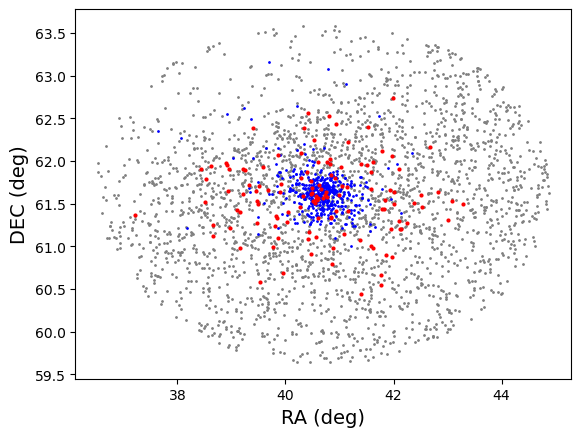

In [147]:
fig, ax = plt.subplots()

ax.scatter(p2_3p.RA_ICRS, p2_3p.DE_ICRS, s=1, c='grey')
ax.scatter(dfvg.RA_ICRS, dfvg.DE_ICRS, s=1, c='b')
ax.scatter(p2_3p.iloc[matched_idx_catalog1].RA_ICRS, p2_3p.iloc[matched_idx_catalog1].DE_ICRS, s=4, c='r')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
# ax.set_ylim(-11.5,-14.2)
# ax.set_xlim(121.2,124.5)

In [148]:
dfvg_t = len(dfvg)
p2_3p_t = len(p2_3p.iloc[matched_idx_catalog1])

Completeness


In [149]:
p2_3p_c = p2_3p_t /dfvg_t
p2_3p_c*100

20.938023450586265

Pureness

In [150]:
p2_3p_p = p2_3p_t/len(p2_3p)
p2_3p_p*100

4.85248447204969

### Population 3

In [151]:
ra1 = p3_3p.RA_ICRS
dec1 = p3_3p.DE_ICRS

ra2 = dfvg.RA_ICRS
dec2 = dfvg.DE_ICRS

In [152]:
#Catalogue from my work with GMM
catalog1 = SkyCoord(ra=ra1, dec=dec1, unit='degree')
#Catalogue from vG+2023
catalog2 = SkyCoord(ra=ra2, dec=dec2, unit='degree')

In [153]:
idx, d2d, d3d = catalog1.match_to_catalog_sky(catalog2)

In [154]:
max_sep = 1.0 * u.arcsec  # Exemplo de separacao limite de 1 segundo de arco
matches = d2d < max_sep

# Selecionar apenas correspondências válidas
matched_idx = idx[matches]
matched_d2d = d2d[matches]

In [155]:
matched_idx_catalog1 = np.where(matches)[0]
matched_idx_catalog2 = idx[matches]

In [156]:
p3_3p.iloc[matched_idx_catalog1]


,RA_ICRS,DE_ICRS,Source,Plx,e_Plx,PM,pmRA,pmDE,Solved,nueff,...,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr,cluster
0,41.570274,61.173409,464949661706849280,0.8300,0.0378,2.577,-1.596,2.023,31,1.440,...,16.192581,16.815716,15.430469,1.385247,NaN,42.572996,41.570289,61.173400,0.858649,2
1,41.654500,61.223746,464950211462625792,0.9554,0.0447,2.603,-1.741,1.936,31,1.433,...,16.519371,17.166830,15.747625,1.419205,NaN,42.602652,41.654516,61.223737,0.984442,2
2,42.138625,61.394109,464956361855632896,0.8718,0.0169,2.700,-1.764,2.044,31,1.610,...,11.991033,12.207760,11.621119,0.586641,-67.03,42.665070,42.138641,61.394100,0.911275,2
3,41.209813,61.006434,465597755092954240,0.8735,0.0226,2.731,-1.759,2.089,31,1.467,...,14.797569,15.339229,14.089526,1.249702,NaN,42.490896,41.209829,61.006425,0.906890,2
5,40.922414,61.094239,465602702895244800,0.9349,0.0354,2.764,-1.855,2.050,31,1.455,...,15.765883,16.284992,14.968859,1.316134,NaN,42.627734,40.922431,61.094230,0.967899,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,39.696708,63.156088,466112807573205248,0.9259,0.0314,2.759,-1.952,1.950,31,1.460,...,15.738831,16.299076,15.020844,1.278232,NaN,44.739631,39.696727,63.156079,0.958138,2
652,41.114886,62.905429,467535884855567872,0.9308,0.0180,2.818,-1.936,2.048,31,1.433,...,8.369972,9.017055,7.584709,1.432346,-43.63,44.239616,41.114905,62.905420,0.959092,2
668,40.787290,63.076067,467553236523330816,0.8373,0.0654,2.841,-1.898,2.113,31,1.412,...,16.967535,17.682224,16.119755,1.562469,NaN,44.456967,40.787309,63.076058,0.867127,2
843,38.075159,62.268499,513984032015800064,0.8460,0.0231,2.857,-1.970,2.068,31,1.488,...,14.957641,15.442095,14.297846,1.144249,NaN,44.262748,38.075178,62.268490,0.878511,2


In [157]:
dfvg.iloc[matched_idx_catalog2]

,Cluster,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,Pmemb
5,NGC_1027,464949661706849280,41.570274,61.173409,0.8300,-1.596,2.023,16.192581,16.815716,15.430469,1.00
3,NGC_1027,464950211462625792,41.654500,61.223746,0.9554,-1.741,1.936,16.519371,17.166830,15.747625,1.00
92,NGC_1027,464956361855632896,42.138625,61.394109,0.8718,-1.764,2.044,11.991033,12.207760,11.621119,1.00
939,NGC_1027,465597755092954240,41.209813,61.006434,0.8735,-1.759,2.089,14.797569,15.339229,14.089526,1.00
794,NGC_1027,465602702895244800,40.922414,61.094239,0.9349,-1.855,2.050,15.765883,16.284992,14.968859,1.00
...,...,...,...,...,...,...,...,...,...,...,...
71,NGC_1027,466112807573205248,39.696708,63.156088,0.9259,-1.952,1.950,15.738831,16.299076,15.020844,0.83
72,NGC_1027,467535884855567872,41.114886,62.905429,0.9308,-1.936,2.048,8.369972,9.017055,7.584709,1.00
1083,NGC_1027,467553236523330816,40.787290,63.076067,0.8373,-1.898,2.113,16.967535,17.682224,16.119755,0.88
160,NGC_1027,513984032015800064,38.075159,62.268499,0.8460,-1.970,2.068,14.957641,15.442095,14.297846,0.98


Text(0, 0.5, 'DEC (deg)')

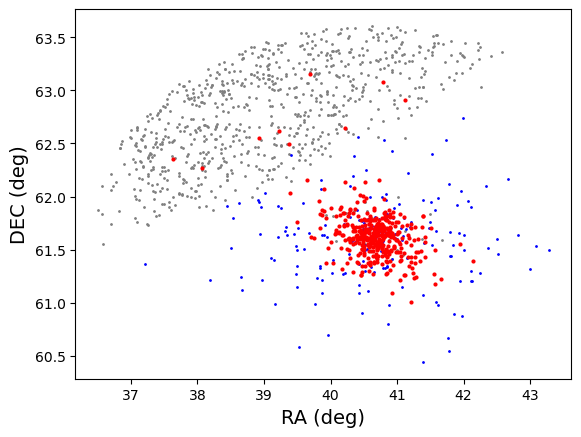

In [159]:
fig, ax = plt.subplots()

ax.scatter(p3_3p.RA_ICRS, p3_3p.DE_ICRS, s=1, c='grey')
ax.scatter(dfvg.RA_ICRS, dfvg.DE_ICRS, s=1, c='b')
ax.scatter(p3_3p.iloc[matched_idx_catalog1].RA_ICRS, p3_3p.iloc[matched_idx_catalog1].DE_ICRS, s=4, c='r')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
# ax.set_ylim(-11.5,-14.2)
# ax.set_xlim(121.2,124.5)

In [160]:
dfvg_t = len(dfvg)
p3_3p_t = len(p3_3p.iloc[matched_idx_catalog1])

Completeness


In [161]:
p3_3p_c = p3_3p_t /dfvg_t
p3_3p_c*100

67.16917922948073

Pureness

In [162]:
p3_3p_p = p3_3p_t/len(p3_3p)
p3_3p_p*100

34.15672913117547

## Analyzing

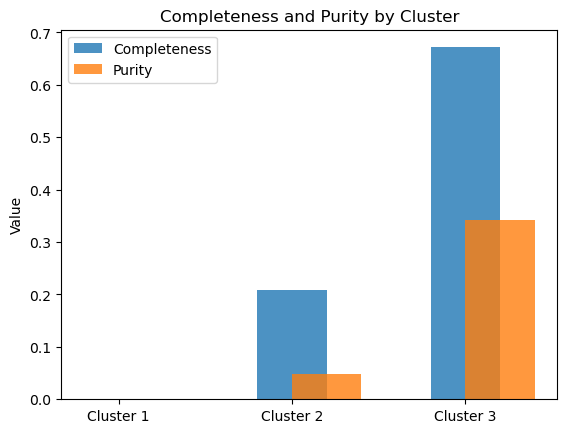

In [163]:
import seaborn as sns

# Dados simulados: completude e pureza por cluster
clusters = [1, 2, 3]
completeness = [p1_3p_c, p2_3p_c, p3_3p_c]  # Exemplo de completude
purity = [p1_3p_p, p2_3p_p, p3_3p_p]  # Exemplo de pureza

# Bar plot
x = range(len(clusters))
plt.bar(x, completeness, width=0.4, label="Completeness", alpha=0.8, align='center')
plt.bar(x, purity, width=0.4, label="Purity", alpha=0.8, align='edge')

plt.xticks(x, [f"Cluster {c}" for c in clusters])
plt.ylabel("Value")
plt.title("Completeness and Purity by Cluster")
plt.legend()
plt.show()

# 2 Populations

In [165]:
p1_2p = pd.read_csv('Catalogues/pop1_NGC1027_GMM1_2populations.csv')
p2_2p = pd.read_csv('Catalogues/pop2_NGC1027_GMM1_2populations.csv')

## Computing Completeness and Purity

### Population 1

In [166]:
ra1 = p1_2p.RA_ICRS
dec1 = p1_2p.DE_ICRS

ra2 = dfvg.RA_ICRS
dec2 = dfvg.DE_ICRS

In [167]:
#Catalogue from my work with GMM
catalog1 = SkyCoord(ra=ra1, dec=dec1, unit='degree')
#Catalogue from vG+2023
catalog2 = SkyCoord(ra=ra2, dec=dec2, unit='degree')

In [168]:
idx, d2d, d3d = catalog1.match_to_catalog_sky(catalog2)

In [169]:
max_sep = 1.0 * u.arcsec  # Exemplo de separacao limite de 1 segundo de arco
matches = d2d < max_sep

# Selecionar apenas correspondências válidas
matched_idx = idx[matches]
matched_d2d = d2d[matches]

In [170]:
matched_idx_catalog1 = np.where(matches)[0]
matched_idx_catalog2 = idx[matches]

In [171]:
p1_2p.iloc[matched_idx_catalog1]


,RA_ICRS,DE_ICRS,Source,Plx,e_Plx,PM,pmRA,pmDE,Solved,nueff,...,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr,cluster
277,41.773826,60.540374,464776037646911104,0.8545,0.1063,2.811,-1.799,2.160,31,1.362,...,17.921892,18.853360,16.956484,1.896875,NaN,41.953426,41.773842,60.540364,0.882463,0
301,41.391974,60.440972,464797963461759488,0.8665,0.0250,2.589,-1.793,1.868,31,1.439,...,15.092919,15.710403,14.297459,1.412945,NaN,41.937564,41.391990,60.440964,0.900277,0
338,41.760686,60.667446,464824798418117120,0.9060,0.0240,2.491,-1.459,2.020,31,1.451,...,15.022243,15.609508,14.280652,1.328855,NaN,42.072503,41.760699,60.667437,0.939593,0
349,41.971368,60.869426,464833766309733248,0.8965,0.0135,2.625,-1.530,2.133,31,1.545,...,13.546622,13.889764,13.031779,0.857985,NaN,42.216559,41.971382,60.869417,0.930231,0
359,41.851684,60.892326,464836652527754368,0.9197,0.0136,2.608,-1.809,1.878,31,1.540,...,12.826741,13.182690,12.293089,0.889601,NaN,42.260835,41.851700,60.892318,0.941174,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2130,40.929175,62.430013,466019207341152256,0.9167,0.0369,2.785,-2.045,1.891,31,1.425,...,15.846997,16.483763,14.985683,1.498079,NaN,43.843213,40.929195,62.430005,0.949817,0
2144,40.799686,62.532005,466023644050466560,0.9817,0.0642,2.630,-1.725,1.986,31,1.393,...,17.081020,17.874979,16.217472,1.657507,NaN,43.960869,40.799703,62.531996,1.012394,0
2163,40.418877,62.564527,466034982764139008,0.9564,0.0162,2.989,-1.798,2.388,31,1.530,...,13.865103,14.244426,13.308497,0.935928,NaN,44.064098,40.418894,62.564516,0.989366,0
2532,42.672829,62.162159,467252240914244480,0.9654,0.0409,2.769,-1.700,2.186,31,1.426,...,16.238014,16.906803,15.442007,1.464796,NaN,43.267141,42.672845,62.162149,0.994258,0


In [172]:
dfvg.iloc[matched_idx_catalog2]

,Cluster,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,Pmemb
399,NGC_1027,464776037646911104,41.773826,60.540374,0.8545,-1.799,2.160,17.921892,18.853360,16.956484,0.79
479,NGC_1027,464797963461759488,41.391974,60.440972,0.8665,-1.793,1.868,15.092919,15.710403,14.297459,0.99
307,NGC_1027,464824798418117120,41.760686,60.667446,0.9060,-1.459,2.020,15.022243,15.609508,14.280652,0.99
289,NGC_1027,464833766309733248,41.971368,60.869426,0.8965,-1.530,2.133,13.546622,13.889764,13.031779,1.00
293,NGC_1027,464836652527754368,41.851684,60.892326,0.9197,-1.809,1.878,12.826741,13.182690,12.293089,1.00
...,...,...,...,...,...,...,...,...,...,...,...
1131,NGC_1027,466019207341152256,40.929175,62.430013,0.9167,-2.045,1.891,15.846997,16.483763,14.985683,1.00
1140,NGC_1027,466023644050466560,40.799686,62.532005,0.9817,-1.725,1.986,17.081020,17.874979,16.217472,0.95
1097,NGC_1027,466034982764139008,40.418877,62.564527,0.9564,-1.798,2.388,13.865103,14.244426,13.308497,1.00
406,NGC_1027,467252240914244480,42.672829,62.162159,0.9654,-1.700,2.186,16.238014,16.906803,15.442007,1.00


Text(0, 0.5, 'DEC (deg)')

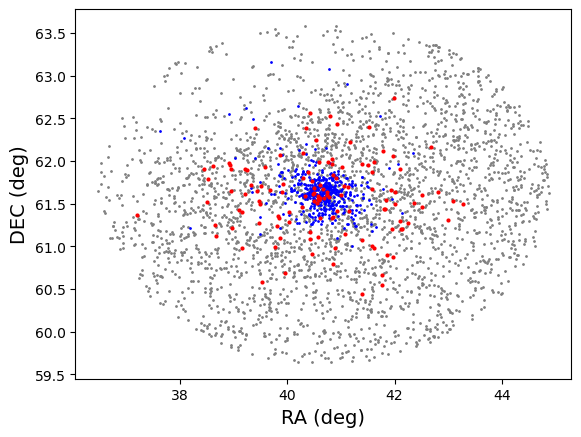

In [173]:
fig, ax = plt.subplots()

ax.scatter(p1_2p.RA_ICRS, p1_2p.DE_ICRS, s=1, c='grey')
ax.scatter(dfvg.RA_ICRS, dfvg.DE_ICRS, s=1, c='b')
ax.scatter(p1_2p.iloc[matched_idx_catalog1].RA_ICRS, p1_2p.iloc[matched_idx_catalog1].DE_ICRS, s=4, c='r')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
# ax.set_ylim(-11.5,-14.2)
# ax.set_xlim(121.2,124.5)

In [174]:
dfvg_t = len(dfvg)
p1_2p_t = len(p1_2p.iloc[matched_idx_catalog1])

Completeness


In [175]:
p1_2p_c = p1_2p_t /dfvg_t
p1_2p_c*100

20.938023450586265

Pureness

In [176]:
p1_2p_p = p1_2p_t/len(p1_2p)
p1_2p_p*100

4.260395364689843

### Population 2

In [177]:
ra1 = p2_2p.RA_ICRS
dec1 = p2_2p.DE_ICRS

ra2 = dfvg.RA_ICRS
dec2 = dfvg.DE_ICRS

In [178]:
#Catalogue from my work with GMM
catalog1 = SkyCoord(ra=ra1, dec=dec1, unit='degree')
#Catalogue from vG+2023
catalog2 = SkyCoord(ra=ra2, dec=dec2, unit='degree')

In [179]:
idx, d2d, d3d = catalog1.match_to_catalog_sky(catalog2)

In [180]:
max_sep = 1.0 * u.arcsec  # Exemplo de separacao limite de 1 segundo de arco
matches = d2d < max_sep

# Selecionar apenas correspondências válidas
matched_idx = idx[matches]
matched_d2d = d2d[matches]

In [181]:
matched_idx_catalog1 = np.where(matches)[0]
matched_idx_catalog2 = idx[matches]

In [182]:
p2_2p.iloc[matched_idx_catalog1]


,RA_ICRS,DE_ICRS,Source,Plx,e_Plx,PM,pmRA,pmDE,Solved,nueff,...,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr,cluster
0,41.570274,61.173409,464949661706849280,0.8300,0.0378,2.577,-1.596,2.023,31,1.440,...,16.192581,16.815716,15.430469,1.385247,NaN,42.572996,41.570289,61.173400,0.858649,1
1,41.654500,61.223746,464950211462625792,0.9554,0.0447,2.603,-1.741,1.936,31,1.433,...,16.519371,17.166830,15.747625,1.419205,NaN,42.602652,41.654516,61.223737,0.984442,1
2,42.138625,61.394109,464956361855632896,0.8718,0.0169,2.700,-1.764,2.044,31,1.610,...,11.991033,12.207760,11.621119,0.586641,-67.03,42.665070,42.138641,61.394100,0.911275,1
3,41.209813,61.006434,465597755092954240,0.8735,0.0226,2.731,-1.759,2.089,31,1.467,...,14.797569,15.339229,14.089526,1.249702,NaN,42.490896,41.209829,61.006425,0.906890,1
5,40.922414,61.094239,465602702895244800,0.9349,0.0354,2.764,-1.855,2.050,31,1.455,...,15.765883,16.284992,14.968859,1.316134,NaN,42.627734,40.922431,61.094230,0.967899,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,39.696708,63.156088,466112807573205248,0.9259,0.0314,2.759,-1.952,1.950,31,1.460,...,15.738831,16.299076,15.020844,1.278232,NaN,44.739631,39.696727,63.156079,0.958138,1
652,41.114886,62.905429,467535884855567872,0.9308,0.0180,2.818,-1.936,2.048,31,1.433,...,8.369972,9.017055,7.584709,1.432346,-43.63,44.239616,41.114905,62.905420,0.959092,1
668,40.787290,63.076067,467553236523330816,0.8373,0.0654,2.841,-1.898,2.113,31,1.412,...,16.967535,17.682224,16.119755,1.562469,NaN,44.456967,40.787309,63.076058,0.867127,1
843,38.075159,62.268499,513984032015800064,0.8460,0.0231,2.857,-1.970,2.068,31,1.488,...,14.957641,15.442095,14.297846,1.144249,NaN,44.262748,38.075178,62.268490,0.878511,1


In [183]:
dfvg.iloc[matched_idx_catalog2]

,Cluster,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,Pmemb
5,NGC_1027,464949661706849280,41.570274,61.173409,0.8300,-1.596,2.023,16.192581,16.815716,15.430469,1.00
3,NGC_1027,464950211462625792,41.654500,61.223746,0.9554,-1.741,1.936,16.519371,17.166830,15.747625,1.00
92,NGC_1027,464956361855632896,42.138625,61.394109,0.8718,-1.764,2.044,11.991033,12.207760,11.621119,1.00
939,NGC_1027,465597755092954240,41.209813,61.006434,0.8735,-1.759,2.089,14.797569,15.339229,14.089526,1.00
794,NGC_1027,465602702895244800,40.922414,61.094239,0.9349,-1.855,2.050,15.765883,16.284992,14.968859,1.00
...,...,...,...,...,...,...,...,...,...,...,...
71,NGC_1027,466112807573205248,39.696708,63.156088,0.9259,-1.952,1.950,15.738831,16.299076,15.020844,0.83
72,NGC_1027,467535884855567872,41.114886,62.905429,0.9308,-1.936,2.048,8.369972,9.017055,7.584709,1.00
1083,NGC_1027,467553236523330816,40.787290,63.076067,0.8373,-1.898,2.113,16.967535,17.682224,16.119755,0.88
160,NGC_1027,513984032015800064,38.075159,62.268499,0.8460,-1.970,2.068,14.957641,15.442095,14.297846,0.98


Text(0, 0.5, 'DEC (deg)')

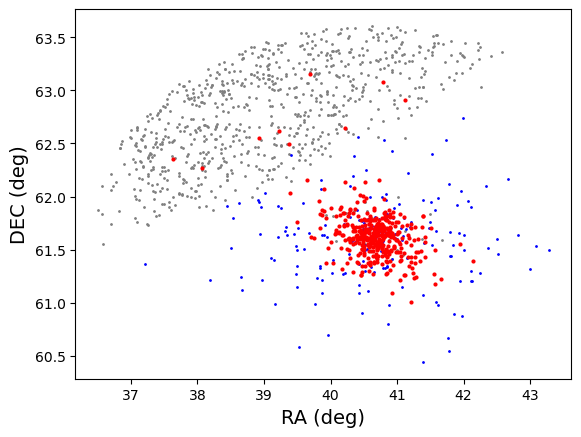

In [184]:
fig, ax = plt.subplots()

ax.scatter(p2_2p.RA_ICRS, p2_2p.DE_ICRS, s=1, c='grey')
ax.scatter(dfvg.RA_ICRS, dfvg.DE_ICRS, s=1, c='b')
ax.scatter(p2_2p.iloc[matched_idx_catalog1].RA_ICRS, p2_2p.iloc[matched_idx_catalog1].DE_ICRS, s=4, c='r')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
# ax.set_ylim(-11.5,-14.2)
# ax.set_xlim(121.2,124.5)

In [185]:
dfvg_t = len(dfvg)
p2_2p_t = len(p2_2p.iloc[matched_idx_catalog1])

Completeness


In [186]:
p2_2p_c = p2_2p_t /dfvg_t
p2_2p_c*100

67.16917922948073

Pureness

In [187]:
p2_2p_p = p2_2p_t/len(p2_2p)
p2_2p_p*100

34.15672913117547

## Analyzing

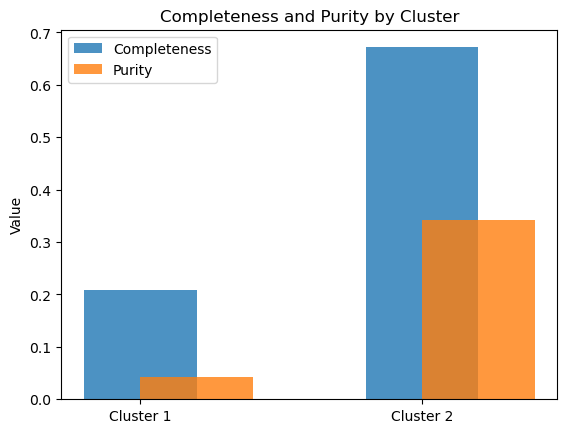

In [188]:
import seaborn as sns

# Dados simulados: completude e pureza por cluster
clusters = [1, 2]
completeness = [p1_2p_c, p2_2p_c]  # Exemplo de completude
purity = [p1_2p_p, p2_2p_p]  # Exemplo de pureza

# Bar plot
x = range(len(clusters))
plt.bar(x, completeness, width=0.4, label="Completeness", alpha=0.8, align='center')
plt.bar(x, purity, width=0.4, label="Purity", alpha=0.8, align='edge')

plt.xticks(x, [f"Cluster {c}" for c in clusters])
plt.ylabel("Value")
plt.title("Completeness and Purity by Cluster")
plt.legend()
plt.show()